# Exercise 2 - Aarhusbolig Visualised
In this week, we will explore the Aarhusbolig dataset with different plot types in order to explain the dataset and draw insights from it.

You are free to use either `matplotlib`, `plotly` or `seaborn` as a plotting tool, or any combination of these. It should also be noted that `pandas` comes with some plotting functionality, but this is not recommended.

In each exercise you are encouraged to experiment with different styling and formatting of the plots such that you can communicate what you want to show with the plot in the best way possible.

In [1]:
# if you have not installed following packages, please install them by running:
#!pip install numpy pandas matplotlib plotly

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [3]:
#if you have this error:
#ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed
#run this command:
! pip install nbformat

## 3.1 Load the Data


In [4]:
# load the data from aarhusbolig.csv
df = pd.read_csv('aarhusbolig.csv')
df.head(3)

,listingid,companyid,company,price,url,long,lat,address,type,rooms,...,listings,text,deposit,rent,electricity,heat,water,tv_internet,b-ordning,other
0,4023,31,bk-aarhus,6897,https://aarhusbolig.dk/afdelinger/?bolignr=402...,56.167299,10.189047,Afd. 1 Paludan Müllers Vej/Jens Baggesens Vej,Lejlighed,2,...,201.0,Husdyr: Det er tilladt af have en lille hund (...,10600.0,5366.0,NaN,691.0,200.0,205.0,NaN,7671.356346
1,3003,31,bk-aarhus,7642,https://aarhusbolig.dk/afdelinger/?bolignr=300...,56.167299,10.189047,Afd. 1 Paludan Müllers Vej/Jens Baggesens Vej,Lejlighed,3,...,75.0,Husdyr: Det er tilladt af have en lille hund (...,11100.0,5790.0,NaN,795.0,219.0,205.0,NaN,8496.356346
2,34,31,bk-aarhus,8304,https://aarhusbolig.dk/afdelinger/?bolignr=34&...,56.178432,10.195098,Afd. 2 Haugesundsvej m.fl.,Rækkehus,3,...,2.0,Husdyr: Det er tilladt at holde husdyr.Udgifte...,25000.0,6033.0,NaN,NaN,NaN,450.0,NaN,10298.373530


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   listingid    2116 non-null   int64  
 1   companyid    2116 non-null   int64  
 2   company      2116 non-null   object 
 3   price        2116 non-null   int64  
 4   url          2116 non-null   object 
 5   long         2108 non-null   float64
 6   lat          2108 non-null   float64
 7   address      2116 non-null   object 
 8   type         2116 non-null   object 
 9   rooms        2116 non-null   int64  
 10  size_m2      2116 non-null   int64  
 11  listings     2111 non-null   float64
 12  text         2114 non-null   object 
 13  deposit      2112 non-null   float64
 14  rent         2116 non-null   float64
 15  electricity  338 non-null    float64
 16  heat         1146 non-null   float64
 17  water        1368 non-null   float64
 18  tv_internet  512 non-null    float64
 19  b-ordn

## 3.2 Visualize Categorical Distributions
In this section, we will visualize some of the categorical variables of the dataset: `company`, `type` and `rooms`

Pick one of the mention variables, and apply the following steps:

- Display the distribution with a histogram / bar plot
- Add appropriate labels to the two axis
- Add a title to the plot
- *Optional*: Change the font and coloring of the plot title and/or axis labels
- *Optional*: Do the steps again for the other two variables.

In [6]:
# find the count of each value in the category
df.describe()

,listingid,companyid,price,long,lat,rooms,size_m2,listings,deposit,rent,electricity,heat,water,tv_internet,b-ordning,other
count,2116.000000,2116.000000,2116.000000,2108.000000,2108.000000,2116.000000,2116.000000,2111.000000,2112.000000,2116.000000,338.000000,1146.000000,1368.000000,512.000000,127.000000,2116.000000
mean,1304.086011,460.572779,7074.750473,56.149211,10.156850,2.864367,81.099716,33.493131,19208.986742,6224.594518,431.680473,570.001745,443.162281,208.310547,191.220472,7382.343657
std,1619.710237,346.396808,1897.544945,0.068490,0.091287,1.063931,22.074085,50.859055,10346.433823,1768.592391,203.919527,201.340972,313.591574,67.957216,60.813782,1968.057147
min,1.000000,31.000000,1943.000000,55.892299,9.690276,1.000000,23.000000,1.000000,3000.000000,1674.000000,22.000000,102.000000,68.000000,12.000000,72.000000,2041.331097
25%,102.000000,126.000000,5859.500000,56.115582,10.137881,2.000000,67.000000,8.000000,12594.000000,5058.250000,277.750000,432.000000,237.000000,201.000000,146.000000,6104.712381
50%,948.000000,328.000000,7030.000000,56.159949,10.177202,3.000000,83.000000,17.000000,17000.000000,6179.500000,400.000000,559.500000,331.500000,226.000000,189.000000,7332.897488
75%,1661.250000,715.000000,8253.000000,56.186959,10.200117,4.000000,96.000000,39.000000,22655.000000,7395.500000,557.250000,697.000000,565.250000,226.000000,231.000000,8627.709731
max,9994.000000,1013.000000,14300.000000,56.321262,10.322858,6.000000,148.000000,577.000000,153617.000000,12600.000000,1200.000000,1360.000000,2261.000000,592.000000,370.000000,16702.389471


In [7]:
# create the bar plot

counts = df['company'].value_counts()
values = df['company'].value_counts().index
variable_name = df['company']

fig = px.bar(x=values, y=counts, title="Distribution of listings by companies")
fig.update_xaxes(title_text='Company')
fig.update_yaxes(title_text='Counts')

fig.show()
display(counts)


company
alboa             378
aabnet            261
bk-aarhus         246
al2bolig          240
bf-ringgaarden    188
domibolig         182
almenbo-aarhus    148
bbbo              147
oestjyskbolig     107
aarhusomegn        97
vejlby-bf          92
lejerbo            30
Name: count, dtype: int64

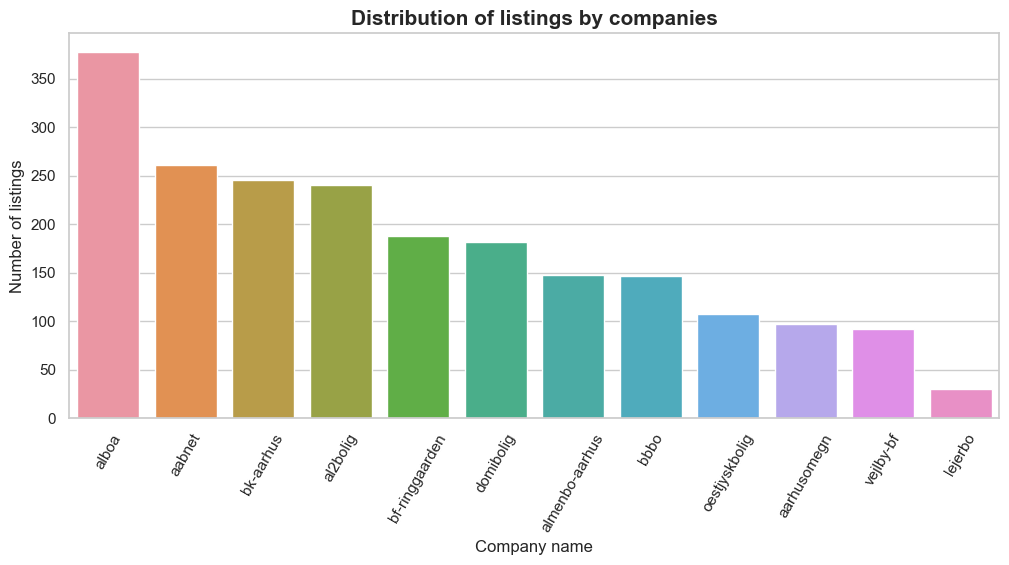

In [8]:
#doing the same thing just in a different way using seaborn

plt.figure(figsize=(12,5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = values , y = counts , data= df)
plt.title("Distribution of listings by companies",fontsize=15, fontweight="bold")
plt.xlabel("Company name")
plt.ylabel("Number of listings")
plt.xticks(rotation=60)
plt.show()


## 3.3 Visualize Location Data
In this section, we will visualize the location data (`long`, `lat`) of the listed housings in the dataset.
- Create a geo scatter plot, that includes the Aarhus area (e.g. using `go.Scattermapbox`)
- Add the location data to the scatter plot
- Add axis labels and plot title
- Color the data points according to one of the categorical variables: `company`, `type` and `rooms`
- *Optional*: Change the size of the data points according to the size of the housing `size_m2`
- *Optional*: Center the map on the average `long`, `lat` location
- *Optional*: Create two extra plots with coloring for the other categorical variables
- *Optional*: Add text on hower to the datapoints that holds some information that you think is valuable. Could be rent, size, number of rooms, etc.

In [9]:
# get the location data

df_locations = df[['long', 'lat', 'size_m2', 'rent', 'rooms']]
df_locations.head()

,long,lat,size_m2,rent,rooms
0,56.167299,10.189047,70,5366.0,2
1,56.167299,10.189047,77,5790.0,3
2,56.178432,10.195098,102,6033.0,3
3,56.178432,10.195098,102,6033.0,4
4,56.167897,10.184841,28,1915.0,1


In [10]:
df.isnull().sum()

listingid         0
companyid         0
company           0
price             0
url               0
long              8
lat               8
address           0
type              0
rooms             0
size_m2           0
listings          5
text              2
deposit           4
rent              0
electricity    1778
heat            970
water           748
tv_internet    1604
b-ordning      1989
other             0
dtype: int64

In [11]:
df_cleaned = df.dropna(subset=['long', 'lat'])
df_cleaned.isnull().sum()

listingid         0
companyid         0
company           0
price             0
url               0
long              0
lat               0
address           0
type              0
rooms             0
size_m2           0
listings          5
text              2
deposit           4
rent              0
electricity    1770
heat            970
water           748
tv_internet    1596
b-ordning      1981
other             0
dtype: int64

In [36]:
# Create a scatter plot
fig = go.Figure()

fig.add_trace(go.Scattermapbox(
    lat=df_cleaned['long'], # have to swap the long and lat because the dataset has these two mixed up
    lon=df_cleaned['lat'],
    mode='markers',
    marker=dict(
        size=df_cleaned['size_m2'] / 10,   # making the size of markers based on size_m2
        color=df_cleaned['rooms'],         # distinguishing the color by number of rooms
        colorscale='Viridis',              # Optional: Choose a colorscale
        colorbar_title='Number of Rooms',  # Optional: Colorbar title
        showscale=True
    ),
    hovertemplate=
    '<b>Company:</b> %{marker.color:.0f}<br>' +  # Customizing hover text with desired information
    '<b>Type:</b> %{text}<br>' +
    '<b>Size:</b> %{marker.size:.0f} m<sup>2</sup><extra></extra>',  # Additional information in hover text
    text=df_cleaned['type']  # Text displayed when hovering over points
))

fig.update_layout(
    mapbox_style="open-street-map",  # Choose map style
    mapbox_center={"lat": df_cleaned['long'].mean(), "lon": df_cleaned['lat'].mean()},  # Centering the map
    mapbox_zoom=10,  # Adjusting zoom level
    title="Housing Locations in Aarhus Area",
    xaxis_title="Longitude",
    yaxis_title="Latitude"
)

fig.show()

## 3.4 Pricing Distributions and Correlations
In this section we will look at distribution of pricing, along with visualizing the correlation of the rent, or other price variable, to another variable.

### 3.4.1 Price Distribution for heat, electricity and water
We want to visualize the distribution of the cost of `heat`, `electricity`, `water` and `tv_internet`.
- Create a histogram plot displaying one of the
    - Add axis labels and plot title
- Create a histogram containing all the variables
    - Add axis labels and plot title
    - Add plot legends

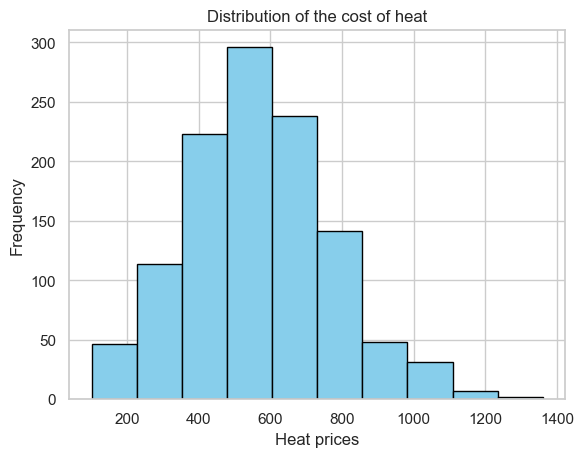

In [13]:
# plot histogram of a single variable - heat

plt.hist(df['heat'], color='skyblue', edgecolor='black')
plt.xlabel('Heat prices')
plt.ylabel('Frequency')
plt.title('Distribution of the cost of heat')
plt.grid(True)
plt.show()

/Users/rebekaborsikova/opt/anaconda3/envs/mypython3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



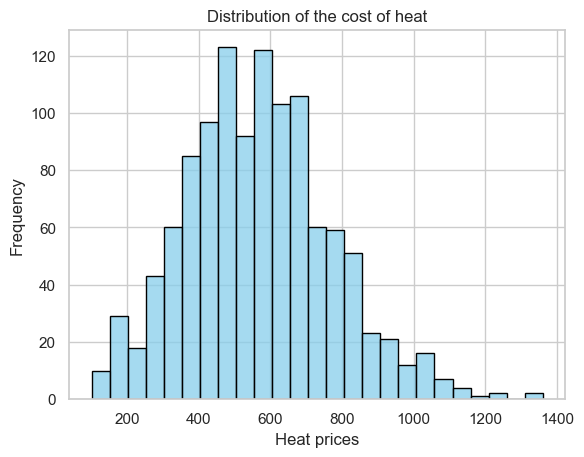

In [14]:
#using another method to do the same 

sns.histplot(df['heat'], color='skyblue', edgecolor='black')
plt.xlabel('Heat prices')
plt.ylabel('Frequency')
plt.title('Distribution of the cost of heat')
plt.grid(True)
plt.show()

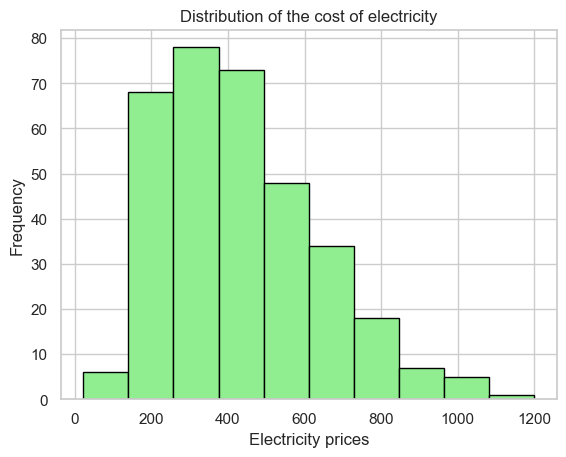

In [15]:
# plot histogram of a single variable - electricity

plt.hist(df['electricity'], color='lightgreen', edgecolor='black')
plt.xlabel('Electricity prices')
plt.ylabel('Frequency')
plt.title('Distribution of the cost of electricity')
plt.grid(True)
plt.show()

/Users/rebekaborsikova/opt/anaconda3/envs/mypython3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



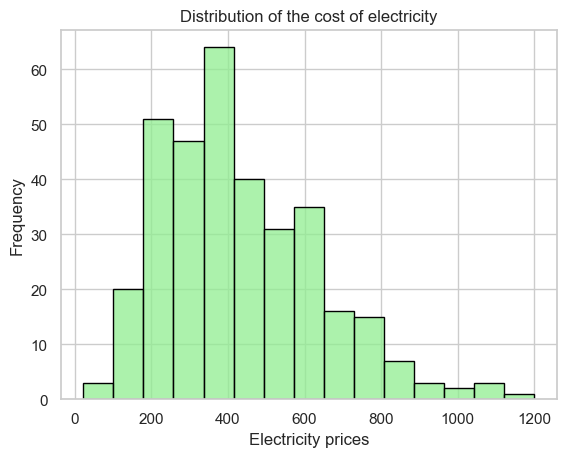

In [16]:
#using another method to do the same 

sns.histplot(df['electricity'], color='lightgreen', edgecolor='black')
plt.xlabel('Electricity prices')
plt.ylabel('Frequency')
plt.title('Distribution of the cost of electricity')
plt.grid(True)
plt.show()

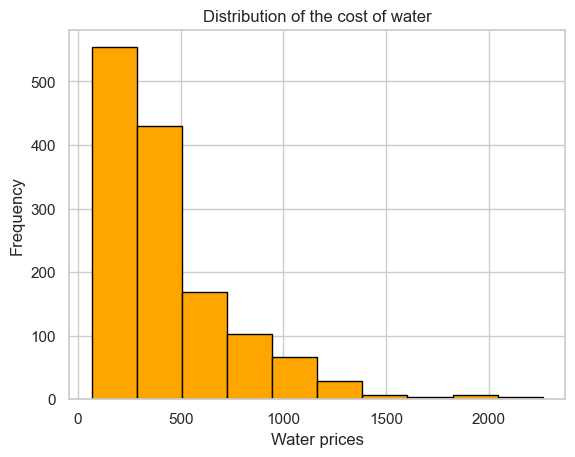

In [17]:
# plot histogram of a single variable - water

plt.hist(df['water'], color='orange', edgecolor='black')
plt.xlabel('Water prices')
plt.ylabel('Frequency')
plt.title('Distribution of the cost of water')
plt.grid(True)
plt.show()

/Users/rebekaborsikova/opt/anaconda3/envs/mypython3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



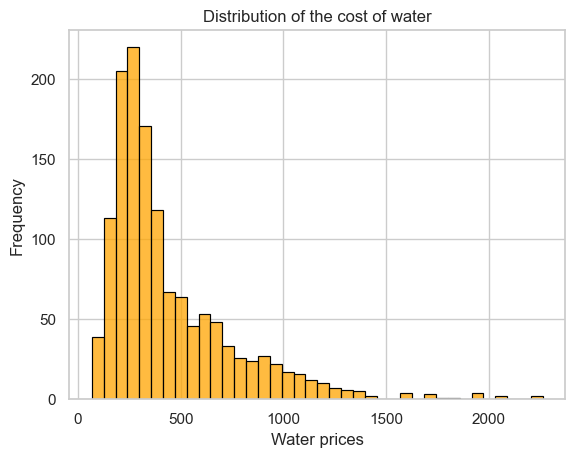

In [18]:
#using another method to do the same 

sns.histplot(df['water'], color='orange', edgecolor='black')
plt.xlabel('Water prices')
plt.ylabel('Frequency')
plt.title('Distribution of the cost of water')
plt.grid(True)
plt.show()

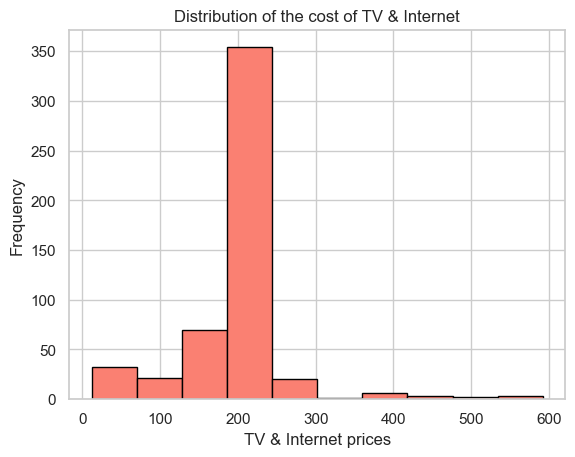

In [19]:
# plot histogram of a single variable - tv_internet

plt.hist(df['tv_internet'], color='salmon', edgecolor='black')
plt.xlabel('TV & Internet prices')
plt.ylabel('Frequency')
plt.title('Distribution of the cost of TV & Internet')
plt.grid(True)
plt.show()

/Users/rebekaborsikova/opt/anaconda3/envs/mypython3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



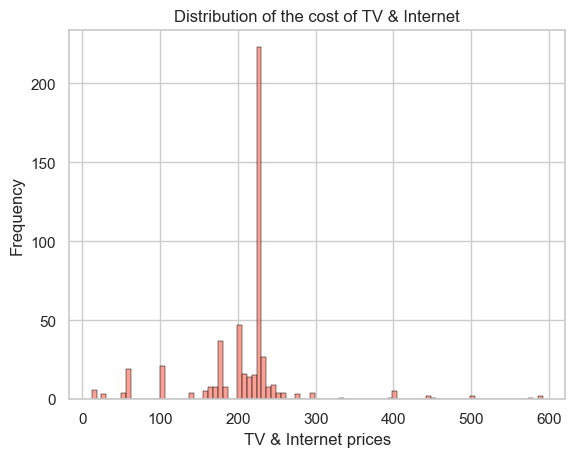

In [20]:
#using another method to do the same 

sns.histplot(df['tv_internet'], color='salmon', edgecolor='black')
plt.xlabel('TV & Internet prices')
plt.ylabel('Frequency')
plt.title('Distribution of the cost of TV & Internet')
plt.grid(True)
plt.show()

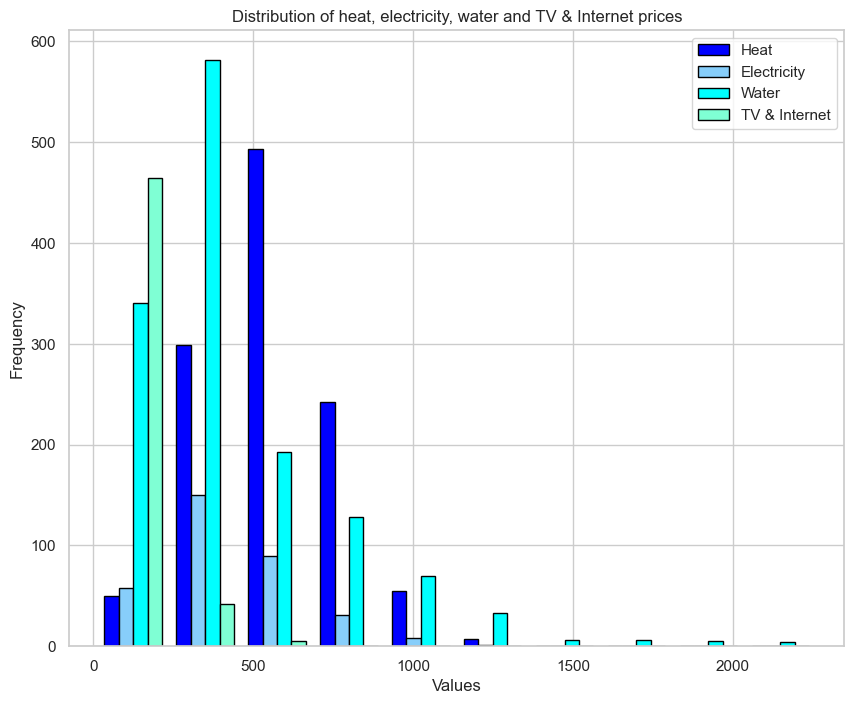

In [21]:
# plot histogram containing all the four variables
data1 = df['heat']
data2 = df['electricity']
data3 = df['water']
data4 = df['tv_internet']
combined_data = [data1, data2, data3, data4]

plt.figure(figsize=(10,8))
plt.hist(combined_data, color=['blue', 'lightskyblue', 'aqua', 'aquamarine'], edgecolor='black', label=['Heat', 'Electricity', 'Water', 'TV & Internet'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of heat, electricity, water and TV & Internet prices')
plt.legend()
plt.grid(True)
plt.show()

### 3.4.2 Compare rent to other variables
We want to visualize how the `rent` changes, depending on one of the other variables: `heat`, `electricity`, `water`, `deposit`, `tv_internet` or `size_m2`.

- Create a scatter plot with `rent` on the y-axis and the other variable on the x-axis
- Add title and axis labels
- Color the data points according to the number of rooms in the housing, remember to add legend

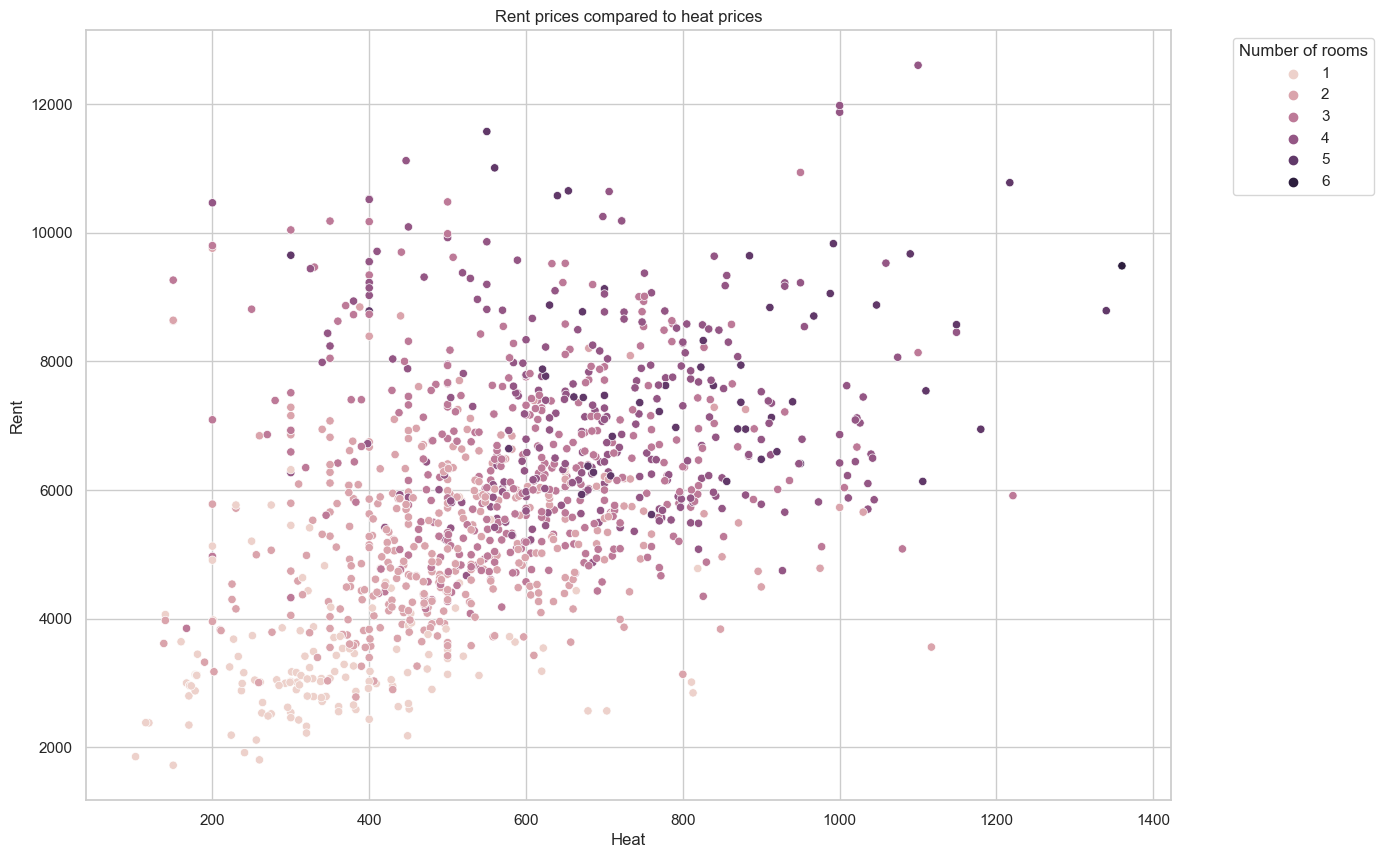

In [22]:
#creating a comparison rent vs heat

plt.figure(figsize=(14, 10))

sns.scatterplot(data=df, x='heat', y='rent', hue='rooms')

plt.xlabel('Heat')
plt.ylabel('Rent')
plt.title('Rent prices compared to heat prices')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Number of rooms")

plt.show()

In [23]:
# this is another (a less colorful, but somewhat more informative) graph showing the linear correlation of 2 variables (with a )

rent_to_heat = px.scatter(data_frame = df, x="heat", y="rent", size="rooms", trendline="ols", title="Relation between rent and heat")
rent_to_heat.show()

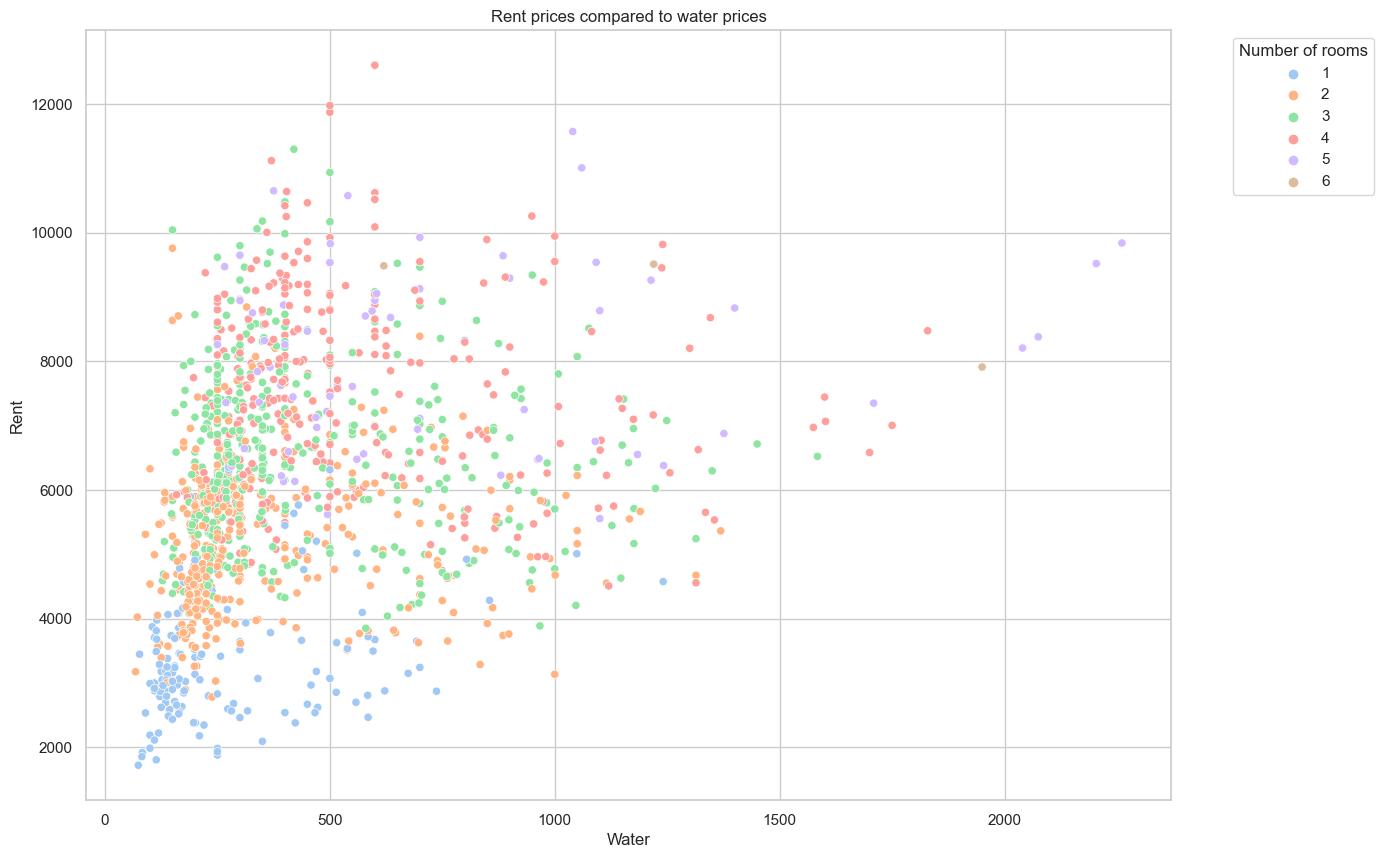

In [24]:
#creating a comparison rent vs water

plt.figure(figsize=(14, 10))

sns.scatterplot(data=df, x='water', y='rent', hue='rooms', palette="pastel")

plt.xlabel('Water')
plt.ylabel('Rent')
plt.title('Rent prices compared to water prices')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Number of rooms")

plt.show()

In [25]:
# creating a comparison rent vs water in another way 

rent_to_water = px.scatter(data_frame = df, x="water", y="rent", size="rooms", trendline="ols", title="Relation between rent and water")
rent_to_water.show()

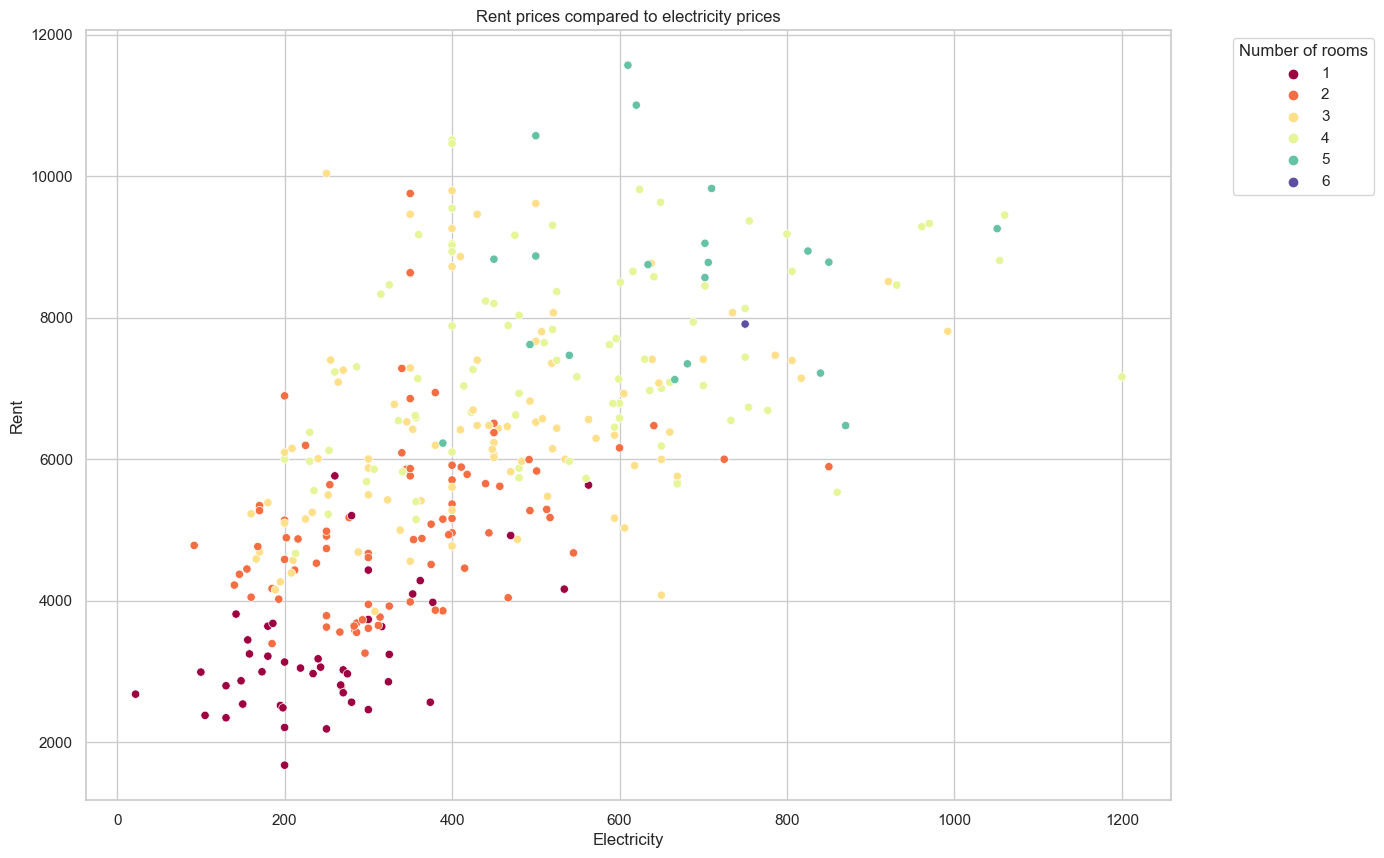

In [26]:
#creating a comparison rent vs electricity

plt.figure(figsize=(14, 10))

sns.scatterplot(data=df, x='electricity', y='rent', hue='rooms', palette="Spectral")

plt.xlabel('Electricity')
plt.ylabel('Rent')
plt.title('Rent prices compared to electricity prices')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Number of rooms")

plt.show()

In [27]:
# creating a comparison rent vs electricity in another way 

rent_to_electricity = px.scatter(data_frame = df, x="electricity", y="rent", size="rooms", trendline="ols", title="Relation between rent and electricity")
rent_to_electricity.show()

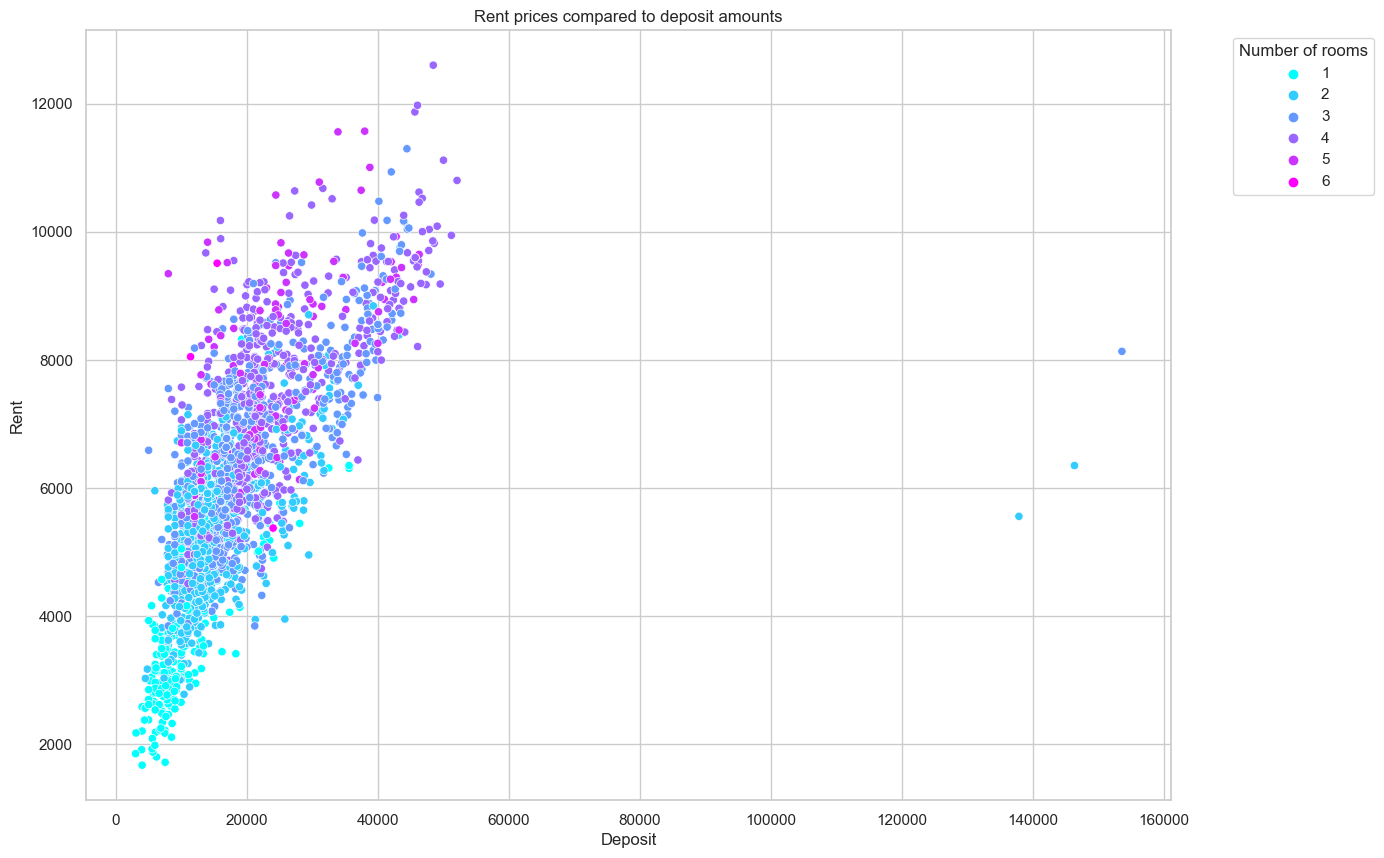

In [28]:
#creating a comparison rent vs deposit

plt.figure(figsize=(14, 10))

sns.scatterplot(data=df, x='deposit', y='rent', hue='rooms', palette="cool")

plt.xlabel('Deposit')
plt.ylabel('Rent')
plt.title('Rent prices compared to deposit amounts')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Number of rooms")

plt.show()

In [29]:
# creating a comparison rent vs deposit in another way 

rent_to_deposit = px.scatter(data_frame = df, x="deposit", y="rent", size="rooms", trendline="ols", title="Relation between rent and deposit")
rent_to_deposit.show()

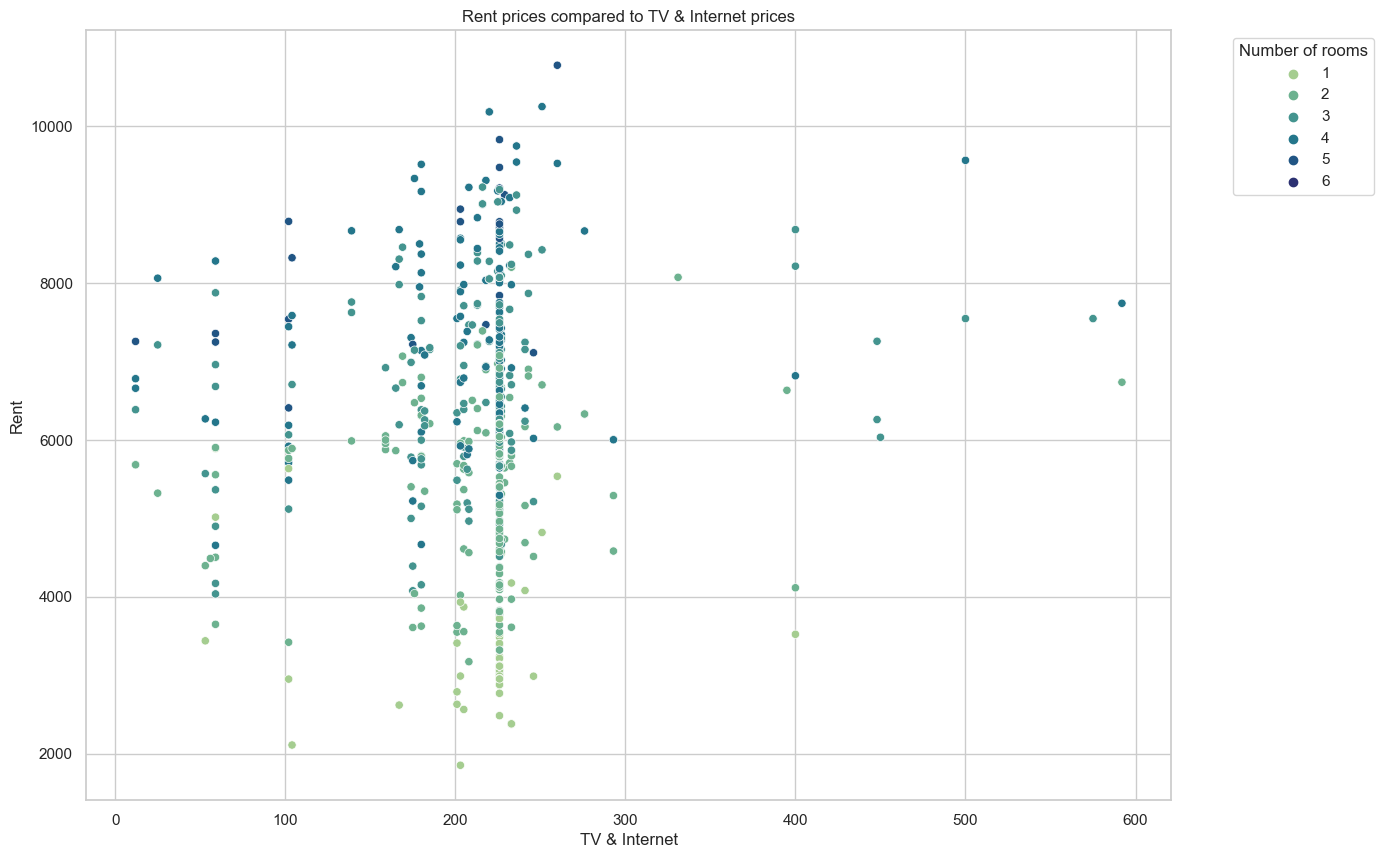

In [30]:
#creating a comparison rent vs tv_internet

plt.figure(figsize=(14, 10))

sns.scatterplot(data=df, x='tv_internet', y='rent', hue='rooms', palette="crest")

plt.xlabel('TV & Internet')
plt.ylabel('Rent')
plt.title('Rent prices compared to TV & Internet prices')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Number of rooms")

plt.show()

In [31]:
# creating a comparison rent vs tv_internet in another way 

rent_to_tvinternet = px.scatter(data_frame = df, x="tv_internet", y="rent", size="rooms", trendline="ols", title="Relation between rent and TV & Internet")
rent_to_tvinternet.show()

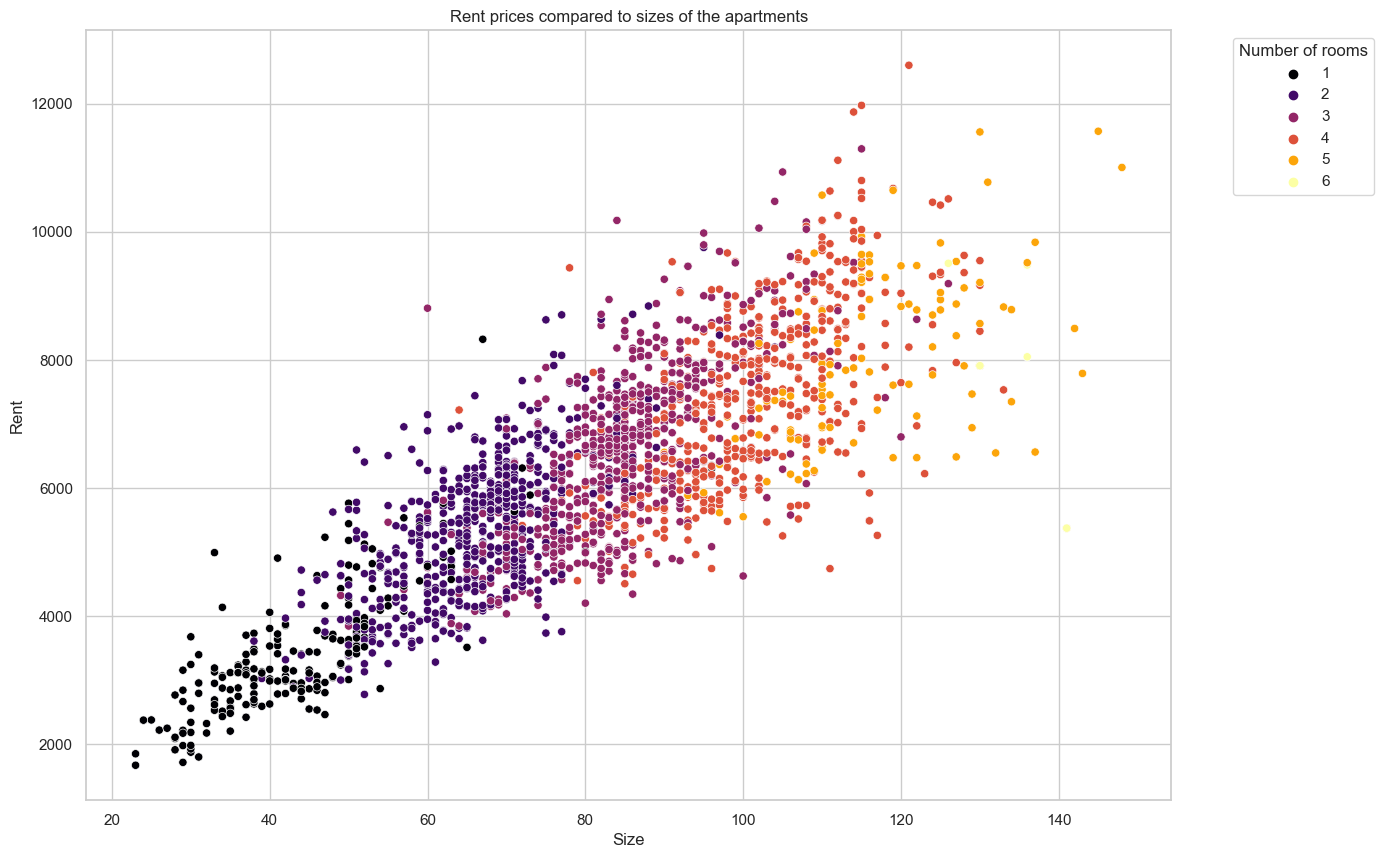

In [32]:
#creating a comparison rent vs size_m2

plt.figure(figsize=(14, 10))

sns.scatterplot(data=df, x='size_m2', y='rent', hue='rooms', palette="inferno")

plt.xlabel('Size')
plt.ylabel('Rent')
plt.title('Rent prices compared to sizes of the apartments')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Number of rooms")

plt.show()

In [33]:
# creating a comparison rent vs size_m2 in another way 

rent_to_size = px.scatter(data_frame = df, x="size_m2", y="rent", size="rooms", trendline="ols", title="Relation between rent and size of the apartment")
rent_to_size.show()

In [34]:
# trying to make a heatmap to see correlations of variables, so here I'm dropping columns we don't need in the heatmap

columns_to_drop = ['company', 'url', 'address', 'type', 'text', 'long', 'lat', 'b-ordning', 'listingid', 'companyid', 'other']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,price,rooms,size_m2,listings,deposit,rent,electricity,heat,water,tv_internet
0,6897,2,70,201.0,10600.0,5366.0,NaN,691.0,200.0,205.0
1,7642,3,77,75.0,11100.0,5790.0,NaN,795.0,219.0,205.0
2,8304,3,102,2.0,25000.0,6033.0,NaN,NaN,NaN,450.0
3,7619,4,102,34.0,25000.0,6033.0,NaN,NaN,NaN,NaN
4,3119,1,28,15.0,3920.0,1915.0,NaN,241.0,83.0,NaN


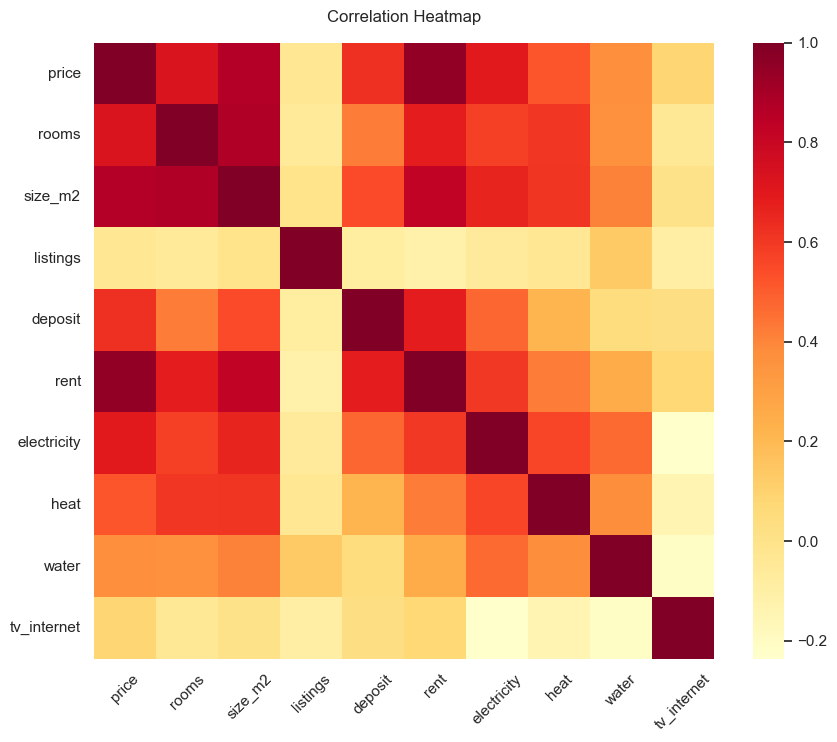

In [35]:
#creating the heatmap

plt.figure(figsize=(10,8))
heatmap = sns.heatmap(df.corr(), cmap= 'YlOrRd')
heatmap.set_title("Correlation Heatmap", pad = 15)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()